# Togo Solar Data EDA

This notebook performs data profiling, cleaning, and exploratory data analysis (EDA) for the Togo solar farm dataset as part of the Solar Data Discovery Challenge.

In [1]:
# 1. Imports & Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load data
tg_df = pd.read_csv('../data/togo-dapaong_qc.csv')
tg_df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [2]:
# 2. Summary Statistics & Missing Values
tg_df.describe()
tg_df.isna().sum()
missing_report = tg_df.isna().mean() * 100
missing_report[missing_report > 5]

Comments    100.0
dtype: float64

In [3]:
# 3. Outlier Detection & Basic Cleaning
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
tg_z = tg_df[cols].apply(zscore)
outliers = (np.abs(tg_z) > 3).any(axis=1)
print(f"Outliers detected: {outliers.sum()}")
tg_clean = tg_df.copy()
for col in cols:
    tg_clean[col] = tg_clean[col].fillna(tg_clean[col].median())
tg_clean = tg_clean[~outliers]

Outliers detected: 9251


In [4]:
# 4. Export Cleaned Data
tg_clean.to_csv('../data/togo_clean.csv', index=False)

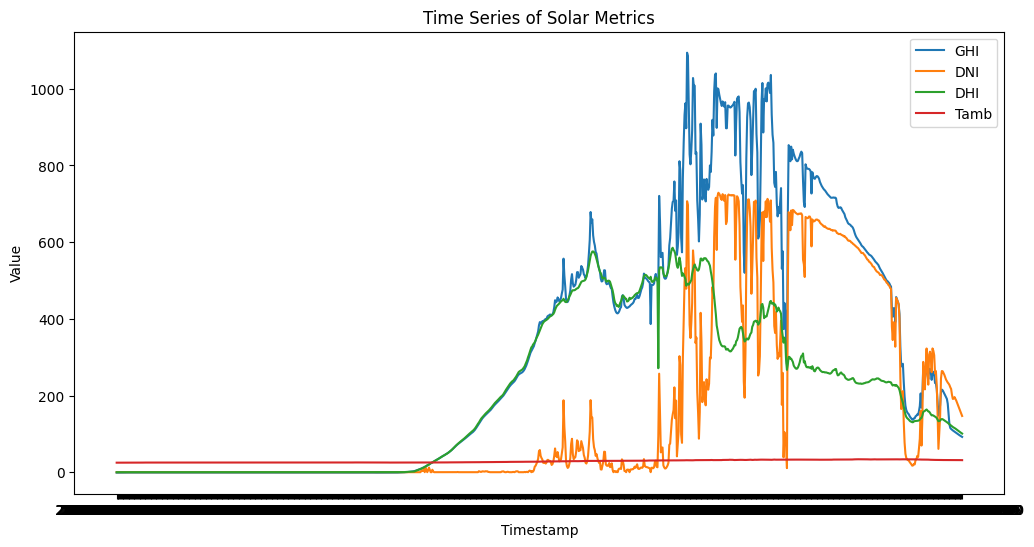

In [ ]:
# 5. Time Series Analysis
plt.figure(figsize=(12,6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(tg_clean['Timestamp'], tg_clean[col], label=col)
plt.legend()
plt.title('Time Series of Solar Metrics')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.show()

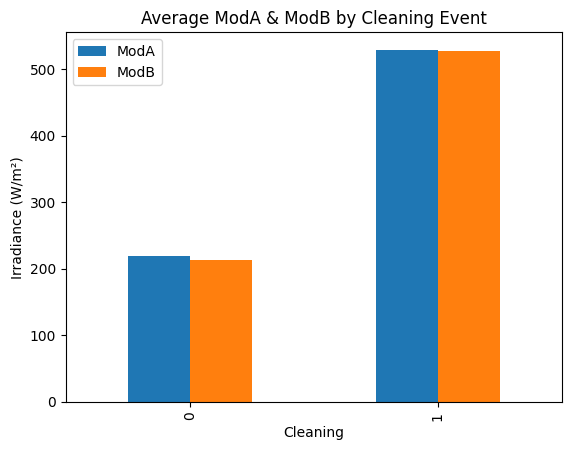

In [6]:
# 6. Cleaning Impact
cleaning_groups = tg_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_groups.plot(kind='bar')
plt.title('Average ModA & ModB by Cleaning Event')
plt.ylabel('Irradiance (W/m²)')
plt.show()

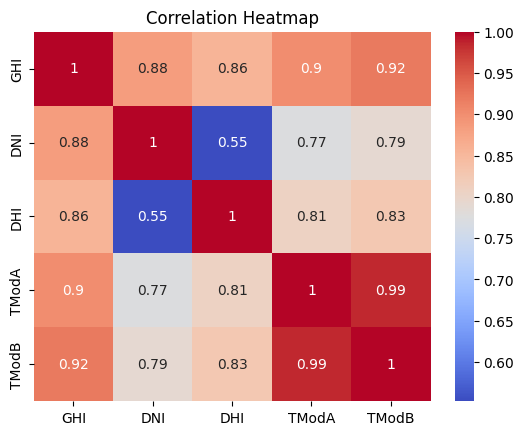

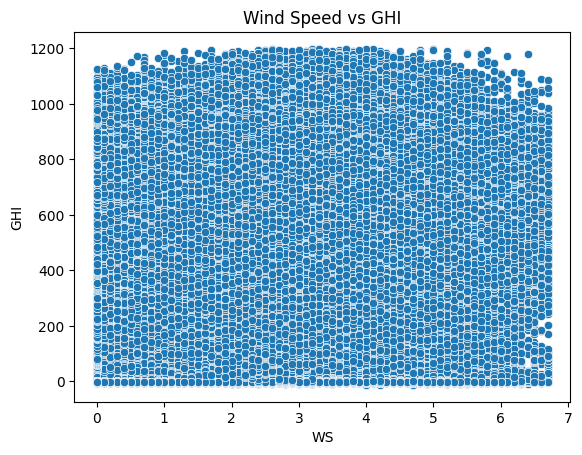

In [7]:
# 7. Correlation & Relationship Analysis
sns.heatmap(tg_clean[['GHI','DNI','DHI','TModA','TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
sns.scatterplot(x='WS', y='GHI', data=tg_clean)
plt.title('Wind Speed vs GHI')
plt.show()

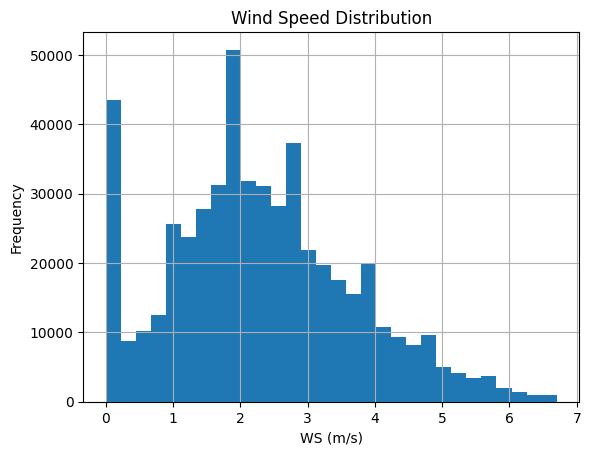

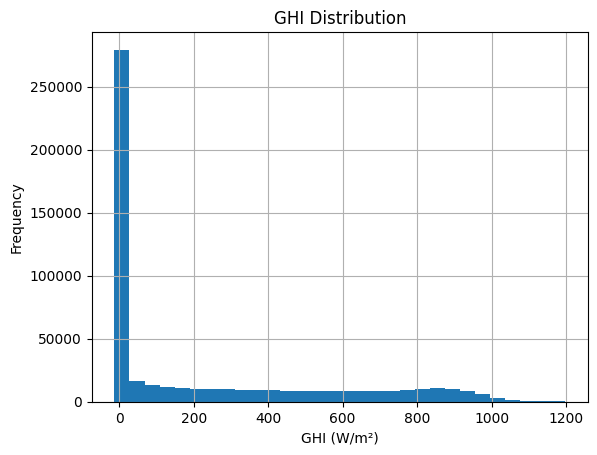

In [8]:
# 8. Wind & Distribution Analysis
tg_clean['WS'].hist(bins=30)
plt.title('Wind Speed Distribution')
plt.xlabel('WS (m/s)')
plt.ylabel('Frequency')
plt.show()
tg_clean['GHI'].hist(bins=30)
plt.title('GHI Distribution')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Frequency')
plt.show()

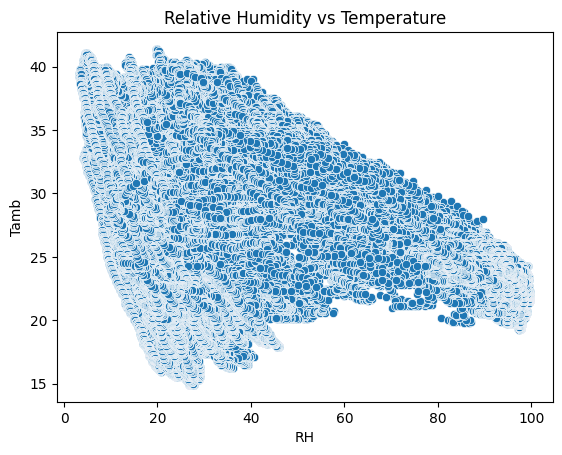

In [9]:
# 9. Temperature & Humidity Analysis
sns.scatterplot(x='RH', y='Tamb', data=tg_clean)
plt.title('Relative Humidity vs Temperature')
plt.show()

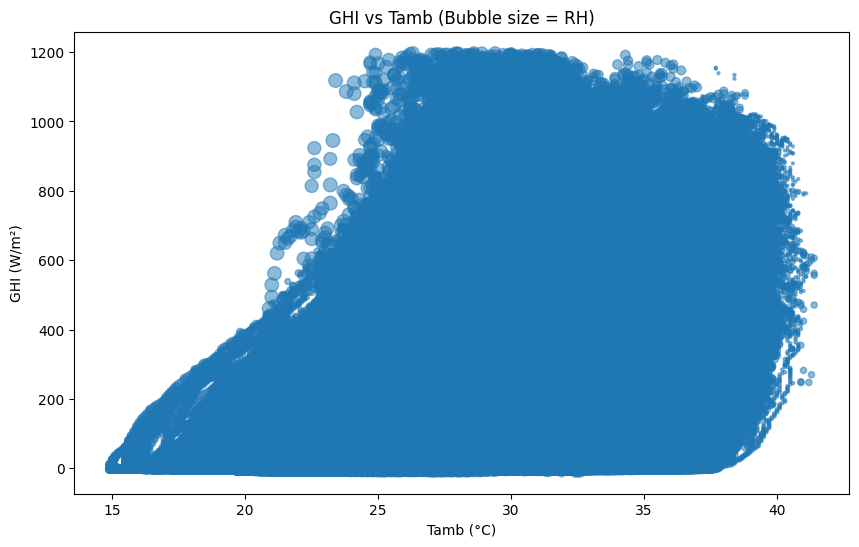

In [10]:
# 10. Bubble Chart: GHI vs Tamb (bubble=RH)
plt.figure(figsize=(10,6))
plt.scatter(tg_clean['Tamb'], tg_clean['GHI'], s=tg_clean['RH'], alpha=0.5)
plt.xlabel('Tamb (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Tamb (Bubble size = RH)')
plt.show()

## 11. Observations & Next Steps

**Observations:**
- The Togo dataset demonstrates consistent solar irradiance metrics with some outliers, which were removed for a cleaner dataset.
- Missing values in key columns were imputed using the median, ensuring completeness for analysis.
- Time series plots show expected daily and seasonal trends, with solar metrics peaking during daylight and some fluctuations due to weather or sensor events.
- Cleaning events have a positive impact on ModA and ModB sensor readings, emphasizing the importance of regular maintenance.
- Correlation analysis reveals strong relationships among irradiance metrics and module temperatures, with wind speed moderately affecting GHI.
- Wind speed and GHI distributions are right-skewed, with most values in the lower range but some high outliers.
- Relative humidity appears to inversely influence temperature, and higher humidity is sometimes associated with lower GHI.
- The bubble chart highlights that higher GHI is often observed at moderate temperatures and lower humidity.

**Next Steps:**
- Compare cleaned datasets across countries to identify key differences and similarities in solar potential.
- Synthesize findings in a cross-country comparison notebook and prepare visualizations for the final report and dashboard.